# Nonsolobaschet Stats | 2018

In [18]:
import fanta
import config

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Scores txt files

### Gianluca | La mamma di Enrico

In [19]:
%%writefile gianluca.txt
gg pf ps gs c mdif
1 68.5 82.5 2 2 1
2 70 76 0 1 0.5
3 79.5 82 0 2 0
4 73.5 72 0 2 1

Overwriting gianluca.txt


### Fabio | Porti Chiusi Italiani

In [20]:
%%writefile fabio.txt
gg pf ps gs c mdif
1 82.5 68.5 1 3 3
2 86 81.5 0 2 1
3 76.5 76.5 0 1 1
4 70.5 69.5 3 3 0

Overwriting fabio.txt


### Enrico | Gianlucanonpressare

In [21]:
%%writefile enrico.txt
gg pf ps gs c mdif
1 73 64 0 1 0
2 71 82.5 1 2 0
3 78.5 80 1 1 2
4 69.5 70.5 1 2 0

Overwriting enrico.txt


### Gabriele | Sciagura

In [22]:
%%writefile gabriele.txt
gg pf ps gs c mdif
1 64.5 76.5 2 2 0
2 82.5 71 0 1 0
3 76.5 76.5 4 1 0
4 72 73.5 2 3 0

Overwriting gabriele.txt


### Luca | Nottingham Forrest Gump

In [23]:
%%writefile luca.txt
gg pf ps gs c mdif
1 76.5 64.5 0 1 1
2 76 70 2 0 1
3 80 78.5 2 3 2
4 78.5 79.5 2 1 1

Overwriting luca.txt


### Riccardo | Lagggente

In [24]:
%%writefile riccardo.txt
gg pf ps gs c mdif
1 64 73 0 4 0.5
2 81.5 86 1 1 2
3 82 79.5 0 3 1
4 79.5 78.5 1 1 1

Overwriting riccardo.txt


# Fill dataframe

In [25]:
df_final = fanta.configure_db()

### Global variables and stats #############################
games = max(df_final.index)   # Total number of matchdays, including uncompleted ones
games_completed = len(df_final.index.unique())   # Total number of matchdays completed
fp_mean = np.mean(df_final['fantapoints made'])
fp_med = np.median(df_final['fantapoints made'])
fp_std = np.std(df_final['fantapoints made'])
gm_mean = np.mean(df_final['GM'])
gm_med = np.median(df_final['GM'])
gm_std = np.std(df_final['GM'])

df_total = fanta.total_df(df_final)

In [26]:
### Data of the last matchday
print('\n### Data matchday number', games, ' ###')
df_last_day = df_final[df_final.index==games]
df_last_day.set_index('team', inplace=True)
display(df_last_day)

### Cumulative data
print('\n\n### Cumulative data after matchday', games, '(', games_completed,' completed )  ###')
param=['pos', 'points', 'distance', 'fantapoints made', 'rank', 'fantapoints against',
       'results', 'GM', 'GA', 'goals against gk',
      'cards', 'defense modifier', 'f_close_games', 'f_day_average', 'Luck Index'
      ] # Parameters to display
display(df_total[param].sort_values(by=['points', 'fantapoints made'], ascending=False))


### Data matchday number 4  ###


,fantapoints made,fantapoints against,goals against gk,cards,defense modifier,GM,GA,result,points,f_close_games,f_day_average,Luck Index
team,,,,,,,,,,,,
enrico,69.5,70.5,1,2,0.0,1,1,T,1,0.2,0.8,1.0
fabio,70.5,69.5,3,3,0.0,1,1,T,1,-0.4,0.8,0.4
gabriele,72.0,73.5,2,3,0.0,2,2,T,1,0.3,-0.4,-0.1
gianluca,73.5,72.0,0,2,1.0,2,2,T,1,-0.6,-0.4,-1.0
luca,78.5,79.5,2,1,1.0,3,3,T,1,0.2,-1.6,-1.4
riccardo,79.5,78.5,1,1,1.0,3,3,T,1,-0.4,-1.6,-2.0




### Cumulative data after matchday 4 ( 4  completed )  ###


,pos,points,distance,fantapoints made,rank,fantapoints against,results,GM,GA,goals against gk,cards,defense modifier,f_close_games,f_day_average,Luck Index
team,,,,,,,,,,,,,,,
fabio,1,8,0,315.5,1,296.0,"2W,2T,0L",13,9,4,9,5.0,-0.2,1.0,0.8
luca,2,8,0,311.0,2,292.5,"2W,2T,0L",12,7,6,5,5.0,-0.4,1.0,0.6
gabriele,3,5,3,295.5,4,297.5,"1W,2T,1L",9,10,8,7,0.0,0.3,0.6,0.9
enrico,4,5,3,292.0,5,297.0,"1W,2T,1L",8,8,3,6,2.0,0.5,1.6,2.1
riccardo,5,4,4,307.0,3,317.0,"1W,1T,2L",11,13,2,9,4.5,0.5,-3.8,-3.3
gianluca,6,1,7,291.5,6,312.5,"0W,1T,3L",7,13,2,7,2.5,-1.1,-2.4,-3.5


# Luck Index

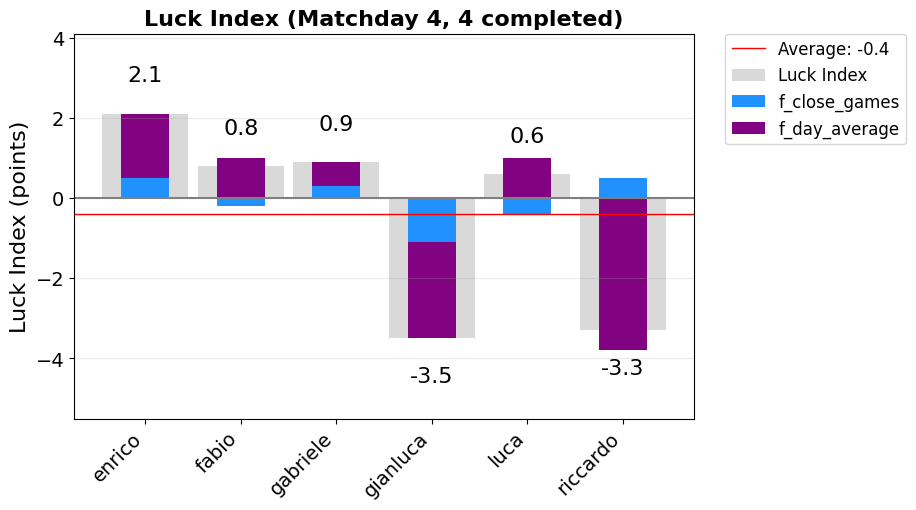

In [27]:
fanta.luck_index_plot(df_total, games, games_completed)

# Evolution Plots

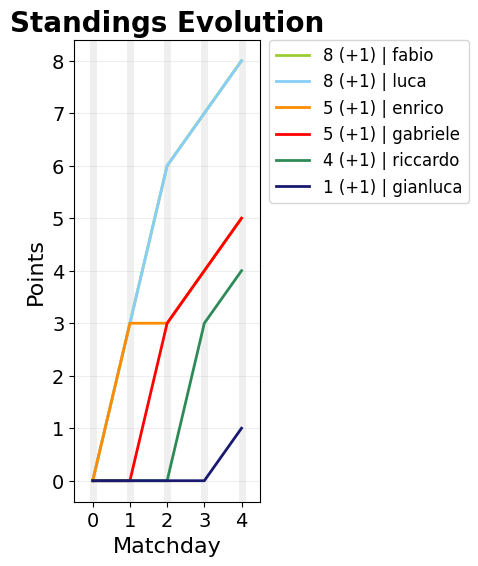

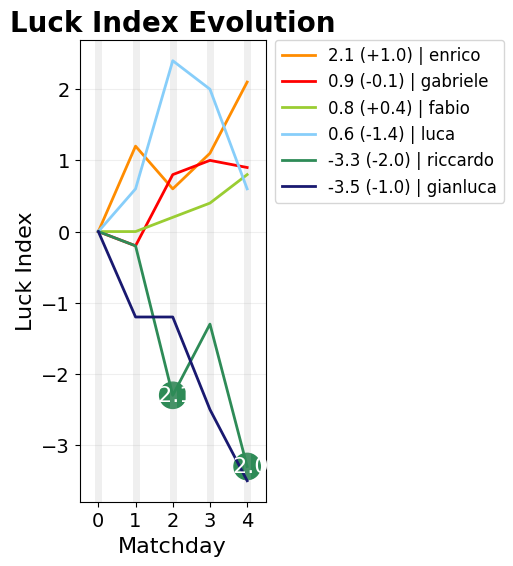

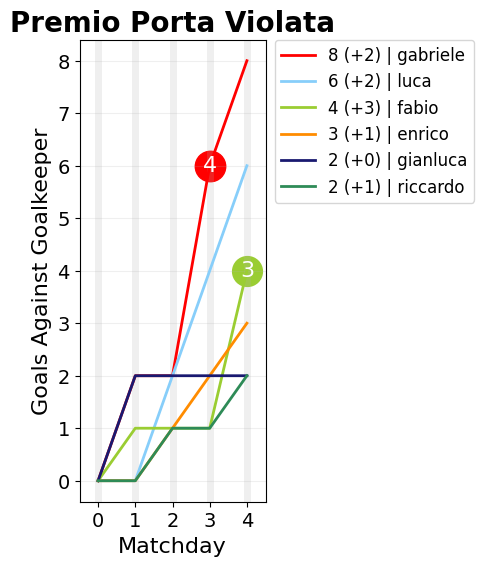

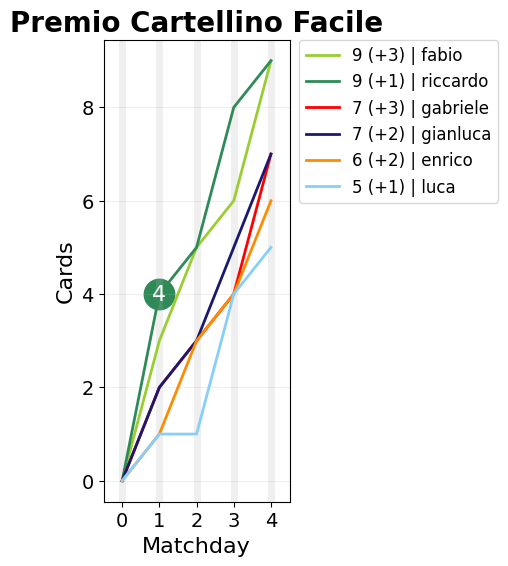

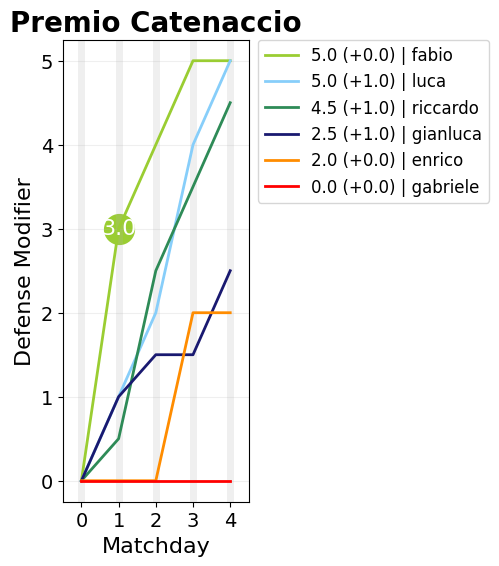

In [28]:
fanta.evo_plot(games, df_final, par='points', title='Standings Evolution', ylabel='Points', threshold=4)
fanta.evo_plot(games, df_final, par='Luck Index', title='Luck Index Evolution', ylabel='Luck Index', threshold=1.9)
fanta.evo_plot(games, df_final,
               par='goals against gk', title='Premio Porta Violata', ylabel='Goals Against Goalkeeper', threshold=2)
fanta.evo_plot(games, df_final,
               par='cards', title='Premio Cartellino Facile', ylabel='Cards', threshold=3)
fanta.evo_plot(games, df_final,
               par='defense modifier', title='Premio Catenaccio', ylabel='Defense Modifier', threshold=2) 

# Box plots

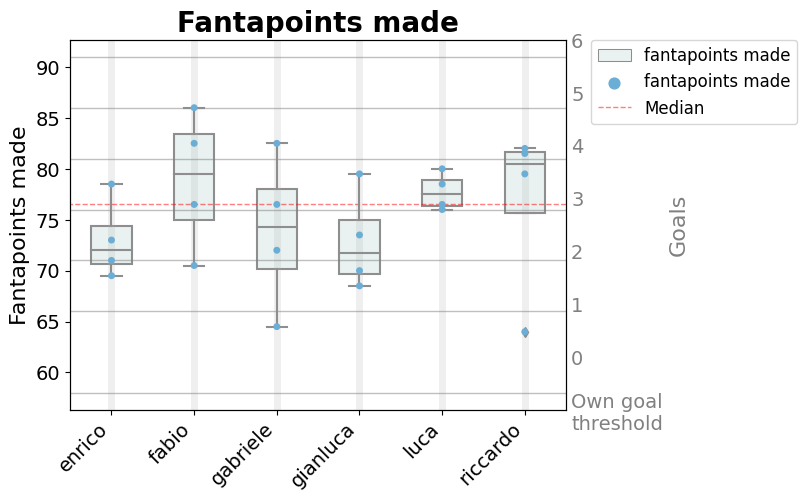

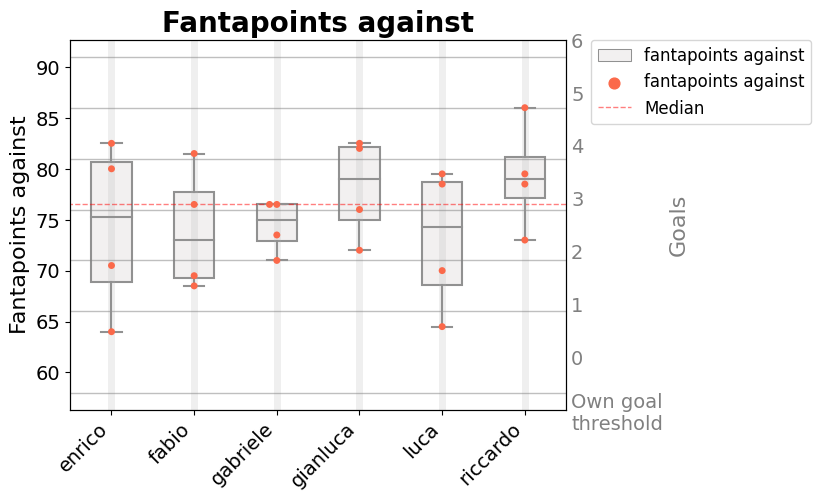

In [29]:
fanta.box_plot(df_final, fp_med,
               par='fantapoints made', label= 'Fantapoints made', title='Fantapoints made', col='cyan', pal='Blues')
fanta.box_plot(df_final, fp_med,
               par='fantapoints against', label= 'Fantapoints against', title='Fantapoints against', col='r', pal='Reds')

# Grahical display of results

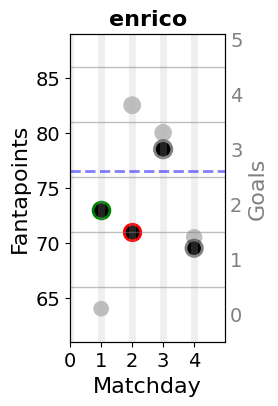

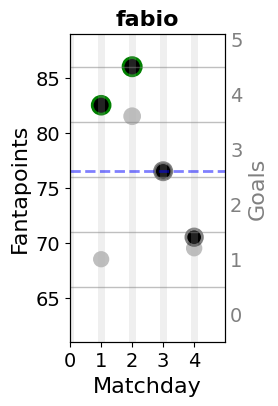

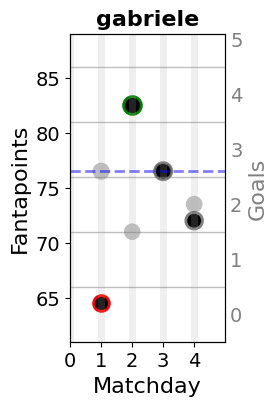

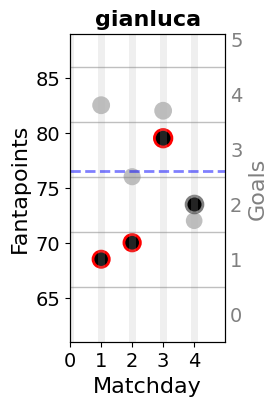

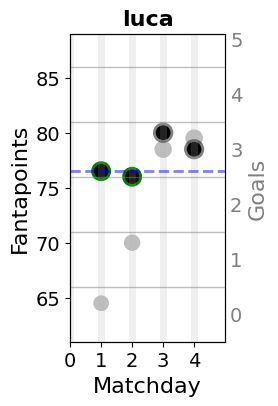

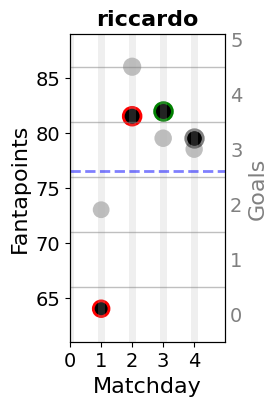

In [30]:
fanta.graphical_results(df_final, games, fp_med)

# Points and Goals vs Expected values

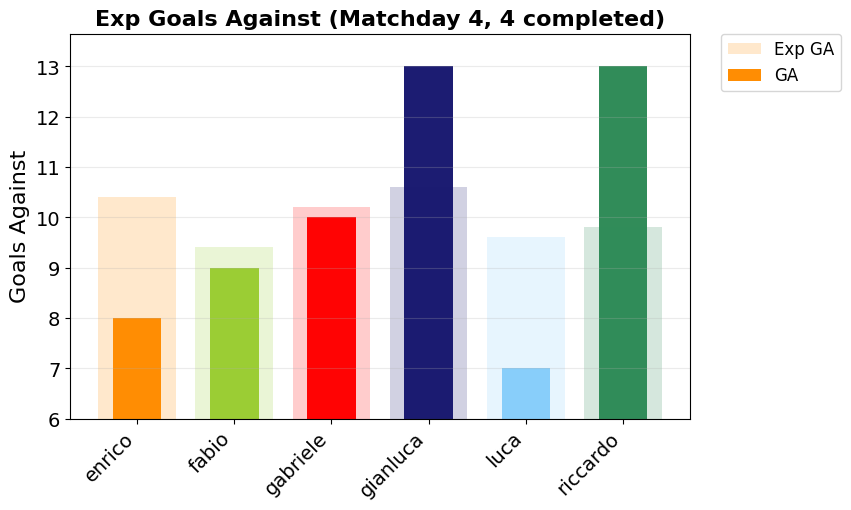

In [31]:
### Expected value of goals against, facing all other opponents ##############################
fanta.exp_goal_plot(df_total, games, games_completed)

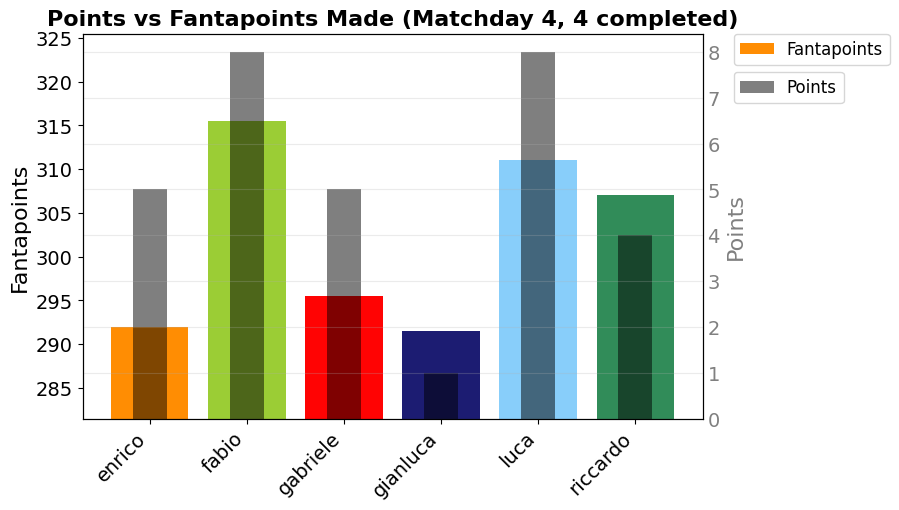

In [32]:
### Fantapoints made vs classification ###############
fanta.fantap_vs_class(df_total, games, games_completed)

# Stats & more

In [33]:
print('### CUMULATIVE DATA after matchday', games, '(', games_completed,' completed )  ###')
print('Fantapoints made:\n average =', fp_mean, '\n median =', fp_med, '\n standard deviation =', fp_std, 
      '\nGoals made:\n average =', gm_mean, '\n median =', gm_med, '\n standard deviation =', gm_std
     )

### Personal stats #####################################
personal_average = {}
for team, new_df in df_final.groupby(['team']):
    personal_average[team] = np.mean(new_df['fantapoints made'])
print('\n Personal Averages (Fantapoints):')
display(personal_average)

### CUMULATIVE DATA after matchday 4 ( 4  completed )  ###
Fantapoints made:
 average = 75.52083333333333 
 median = 76.5 
 standard deviation = 5.7599174738493915 
Goals made:
 average = 2.5 
 median = 3.0 
 standard deviation = 1.2909944487358056

 Personal Averages (Fantapoints):


{'enrico': 73.0,
 'fabio': 78.875,
 'gabriele': 73.875,
 'gianluca': 72.875,
 'luca': 77.75,
 'riccardo': 76.75}

In [34]:
### Display data divided by player

print('### PERSONAL DATA ###\n')

gms = np.arange(1, games+1)

for team, new_df in df_final.groupby(['team']):
    print('Team:', config.Teams[team][0], '(',team,')')
    display(new_df.drop(['team'], axis=1).reindex(gms, fill_value='--'))
    print('\n\n')

### PERSONAL DATA ###

Team: Gianlucanonpressare ( enrico )


,fantapoints made,fantapoints against,goals against gk,cards,defense modifier,GM,GA,result,points,f_close_games,f_day_average,Luck Index
Game,,,,,,,,,,,,
1,73.0,64.0,0,1,0.0,2,0,W,3,0.0,1.2,1.2
2,71.0,82.5,1,2,0.0,2,4,L,0,0.0,-0.6,-0.6
3,78.5,80.0,1,1,2.0,3,3,T,1,0.3,0.2,0.5
4,69.5,70.5,1,2,0.0,1,1,T,1,0.2,0.8,1.0





Team: Porti Chiusi Italiani ( fabio )


,fantapoints made,fantapoints against,goals against gk,cards,defense modifier,GM,GA,result,points,f_close_games,f_day_average,Luck Index
Game,,,,,,,,,,,,
1,82.5,68.5,1,3,3.0,4,1,W,3,0.0,0.0,0.0
2,86.0,81.5,0,2,1.0,5,4,W,3,0.2,0.0,0.2
3,76.5,76.5,0,1,1.0,3,3,T,1,0.0,0.2,0.2
4,70.5,69.5,3,3,0.0,1,1,T,1,-0.4,0.8,0.4





Team: Sciagura ( gabriele )


,fantapoints made,fantapoints against,goals against gk,cards,defense modifier,GM,GA,result,points,f_close_games,f_day_average,Luck Index
Game,,,,,,,,,,,,
1,64.5,76.5,2,2,0.0,0,3,L,0,0.0,-0.2,-0.2
2,82.5,71.0,0,1,0.0,4,2,W,3,0.0,1.0,1.0
3,76.5,76.5,4,1,0.0,3,3,T,1,0.0,0.2,0.2
4,72.0,73.5,2,3,0.0,2,2,T,1,0.3,-0.4,-0.1





Team: La mamma di Enrico ( gianluca )


,fantapoints made,fantapoints against,goals against gk,cards,defense modifier,GM,GA,result,points,f_close_games,f_day_average,Luck Index
Game,,,,,,,,,,,,
1,68.5,82.5,2,2,1.0,1,4,L,0,0.0,-1.2,-1.2
2,70.0,76.0,0,1,0.5,1,3,L,0,0.0,0.0,0.0
3,79.5,82.0,0,2,0.0,3,4,L,0,-0.5,-0.8,-1.3
4,73.5,72.0,0,2,1.0,2,2,T,1,-0.6,-0.4,-1.0





Team: Nottingham Forrest Gump ( luca )


,fantapoints made,fantapoints against,goals against gk,cards,defense modifier,GM,GA,result,points,f_close_games,f_day_average,Luck Index
Game,,,,,,,,,,,,
1,76.5,64.5,0,1,1.0,3,0,W,3,0.0,0.6,0.6
2,76.0,70.0,2,0,1.0,3,1,W,3,0.0,1.8,1.8
3,80.0,78.5,2,3,2.0,3,3,T,1,-0.6,0.2,-0.4
4,78.5,79.5,2,1,1.0,3,3,T,1,0.2,-1.6,-1.4





Team: Laggente ( riccardo )


,fantapoints made,fantapoints against,goals against gk,cards,defense modifier,GM,GA,result,points,f_close_games,f_day_average,Luck Index
Game,,,,,,,,,,,,
1,64.0,73.0,0,4,0.5,0,2,L,0,0.0,-0.2,-0.2
2,81.5,86.0,1,1,2.0,4,5,L,0,-0.1,-2.0,-2.1
3,82.0,79.5,0,3,1.0,4,3,W,3,1.0,0.0,1.0
4,79.5,78.5,1,1,1.0,3,3,T,1,-0.4,-1.6,-2.0
